For below problem following hyperparameters are used:

*   Learning rate = 0.02
*   epochs = 25




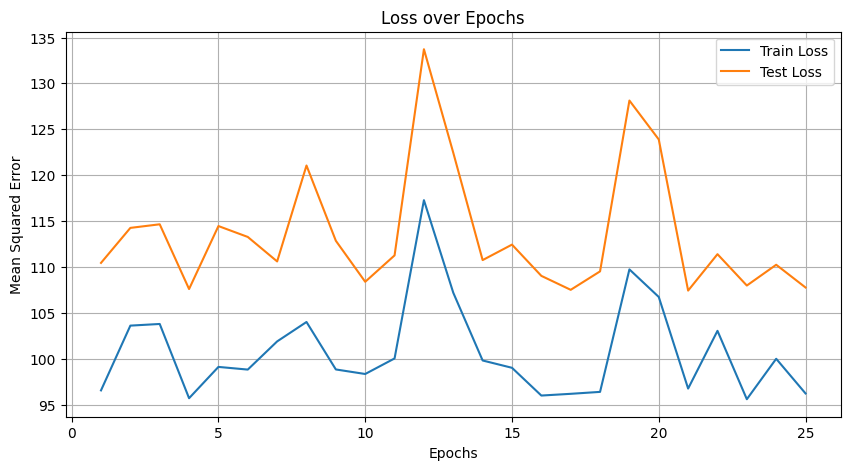

Average Convergence Rate: 100.81685355410532


In [59]:
#Problem 3

#Imports
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error

# Generate some random regression data
X, y = make_regression(n_samples=1000, n_features=1, noise=10, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Implement SGD algorithm
# Hyperparams
learning_rate = 0.02
epochs = 25

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize weight:w and bias:b
np.random.seed(42)
w = np.random.randn(X_train_scaled.shape[1])
b = np.random.randn()

#track train and test loss over each epoch
train_losses = []
test_losses = []

for epoch in range(epochs):
    shuffled_indices = np.random.permutation(len(X_train_scaled))
    X_train_shuffled = X_train_scaled[shuffled_indices]
    y_train_shuffled = y_train[shuffled_indices]

    # SGD iteration
    for i in range(len(X_train_shuffled)):
        xi = X_train_shuffled[i]
        yi = y_train_shuffled[i]
        y_pred = np.dot(xi, w) + b
        w_gradient = -2 * xi * (yi - y_pred)
        b_gradient = -2 * (yi - y_pred)
        w -= learning_rate * w_gradient
        b -= learning_rate * b_gradient

    train_loss = mean_squared_error(y_train, np.dot(X_train_scaled, w) + b)
    test_loss = mean_squared_error(y_test, np.dot(X_test_scaled, w) + b)

    train_losses.append(train_loss)
    test_losses.append(test_loss)

# Plot data
plt.figure(figsize=(10, 5))
plt.plot(range(1, epochs+1), train_losses, label='Train Loss')
plt.plot(range(1, epochs+1), test_losses, label='Test Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.grid(True)
plt.show()

avgConvergenceRate = sum(train_losses) / len(train_losses)
print("Average Convergence Rate:", avgConvergenceRate)

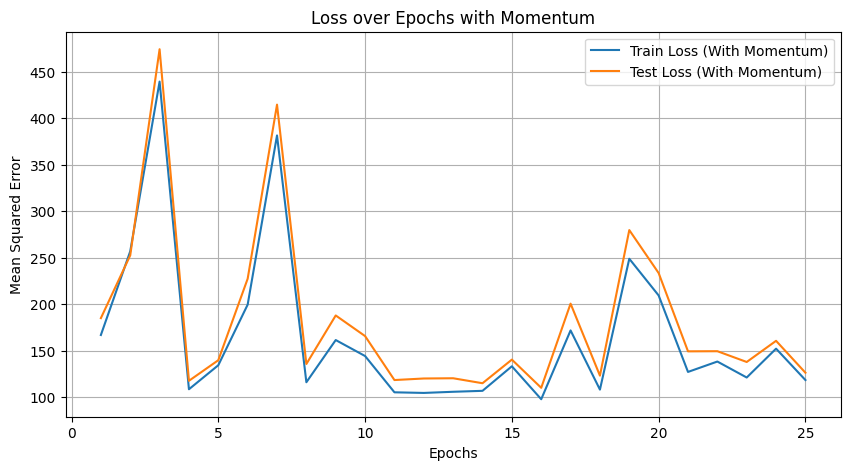

Average Convergence Rate: 166.20791762842669


In [60]:
#Problem4- Momentum

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error

# Generate synthetic data
X, y = make_regression(n_samples=1000, n_features=1, noise=10, random_state=42)

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
y = y.reshape(-1, 1)  # Reshape y to match X's shape
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
# Hyperparams
learning_rate = 0.02
momentum = 0.9
epochs = 25
# Implement SGD momentum
np.random.seed(42)
w = np.random.randn(X_train.shape[1])
b = np.random.randn()
v_w = np.zeros_like(w)
v_b = 0

#Array to hold train and test losses
trainLossArrMom = []
testLossArrMom = []

for epoch in range(epochs):
    shuffled_indices = np.random.permutation(len(X_train))
    X_train_shuffled = X_train[shuffled_indices]
    y_train_shuffled = y_train[shuffled_indices]

    # SGD iteration with momentum
    for i in range(len(X_train_shuffled)):
        xi = X_train_shuffled[i]
        yi = y_train_shuffled[i]
        y_pred = np.dot(xi, w) + b

        w_gradient = -2 * xi * (yi - y_pred)
        b_gradient = -2 * (yi - y_pred)
        v_w = momentum * v_w - learning_rate * w_gradient
        v_b = momentum * v_b - learning_rate * b_gradient
        w += v_w
        b += v_b

    train_loss = mean_squared_error(y_train, np.dot(X_train, w) + b)
    test_loss = mean_squared_error(y_test, np.dot(X_test, w) + b)

    trainLossArrMom.append(train_loss)
    testLossArrMom.append(test_loss)

# Plot Data
plt.figure(figsize=(10, 5))
plt.plot(range(1, epochs+1), trainLossArrMom, label='Train Loss (With Momentum)')
plt.plot(range(1, epochs+1), testLossArrMom, label='Test Loss (With Momentum)')
plt.title('Loss over Epochs with Momentum')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.grid(True)
plt.show()

# Calculate average rate of convergence
avgConvergenceRate = sum(trainLossArrMom) / len(trainLossArrMom)
print("Average Convergence Rate:", avgConvergenceRate)

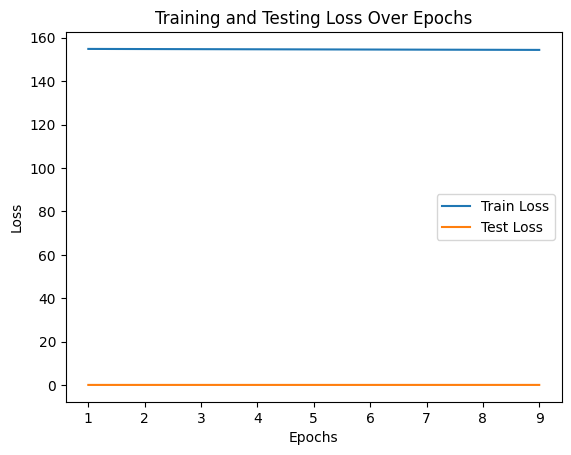

Average Convergence Rate: 154.60050515924468


In [61]:
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Generate synthetic data
X, y = make_regression(n_samples=1000, n_features=1, noise=10, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize MLPRegressor
clf = MLPRegressor(solver='adam',
                    alpha=0.02,
                    max_iter=10,
                    hidden_layer_sizes=(),
                   )

# Initialize lists to store losses
trainLossArrAdam = []
testLossArrAdam = []

# Train the model
for epoch in range(1, 10):
    clf.partial_fit(X_train, y_train)
    train_loss = clf.loss_
    test_loss = clf.score(X_test, y_test)
    trainLossArrAdam.append(train_loss)
    testLossArrAdam.append(test_loss)

# Plot train and test losses
plt.plot(range(1, 10), trainLossArrAdam, label='Train Loss')
plt.plot(range(1, 10), testLossArrAdam, label='Test Loss')
plt.title('Training and Testing Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
# Calculate average rate of convergence
avgConvergenceRate = sum(trainLossArrAdam) / len(trainLossArrAdam)
print("Average Convergence Rate:", avgConvergenceRate)